# Optimization Methods

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io  # For loading .mat files
import math  # For mathematical operations
import sklearn  # For machine learning utilities
import sklearn.datasets  # For loading datasets

# Custom utility functions (from external modules)
from opt_utils_v1a import (load_params_and_grads, initialize_parameters, forward_propagation, 
                           backward_propagation, compute_cost, predict, predict_dec, 
                           plot_decision_boundary, load_dataset)

from testCases import *  # Import test cases for validating the code

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Set default plot configurations
plt.rcParams['figure.figsize'] = (7.0, 4.0)  # Set default plot size
plt.rcParams['image.interpolation'] = 'nearest'  # Configure image interpolation
plt.rcParams['image.cmap'] = 'gray'  # Set default colormap for images


## 1 - Gradient Descent

In [5]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent.

    Args:
    parameters (dict): A dictionary containing the parameters to be updated.
                       Example: parameters['Wl'], parameters['bl']
    grads (dict): A dictionary containing the gradients to update each parameter.
                  Example: grads['dWl'], grads['dbl']
    learning_rate (float): The learning rate used for updating parameters.

    Returns:
    dict: A dictionary containing the updated parameters.
    """
    
    # Number of layers in the neural network (assumes parameters are stored as W1, b1, W2, b2, ..., Wn, bn)
    L = len(parameters) // 2  # Each layer has W and b, so divide total length by 2

    # Update each parameter (weights and biases) for all layers
    for l in range(1, L + 1):
        # Update weights (W) using gradient descent formula
        parameters[f"W{l}"] -= learning_rate * grads[f"dW{l}"]
        # Update biases (b) using gradient descent formula
        parameters[f"b{l}"] -= learning_rate * grads[f"db{l}"]

    return parameters


In [6]:
# Load test case data for parameters, gradients, and learning rate
parameters, grads, learning_rate = update_parameters_with_gd_test_case()

# Update the parameters using gradient descent
parameters = update_parameters_with_gd(parameters, grads, learning_rate)

# Display updated parameters for the first and second layers
print(f"W1 =\n{parameters['W1']}")  # Updated weights for layer 1
print(f"b1 =\n{parameters['b1']}")  # Updated biases for layer 1
print(f"W2 =\n{parameters['W2']}")  # Updated weights for layer 2
print(f"b2 =\n{parameters['b2']}")  # Updated biases for layer 2


W1 =
[[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 =
[[ 1.74604067]
 [-0.75184921]]
W2 =
[[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 =
[[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


## 3 - Mini-Batch Gradient descent 

In [8]:
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    """
    Creates a list of random mini-batches from the input data (X, Y).
    
    Args:
    X (ndarray): Input data of shape (input_size, number_of_examples).
    Y (ndarray): True "label" vector of shape (1, number_of_examples).
    mini_batch_size (int): Size of each mini-batch, default is 64.
    seed (int): Random seed for shuffling to ensure reproducibility.

    Returns:
    list: List of tuples (mini_batch_X, mini_batch_Y) where each tuple is a mini-batch of data.
    """
    
    # Set the random seed for reproducibility
    np.random.seed(seed)
    
    # Get the total number of training examples
    m = X.shape[1]
    
    # Initialize an empty list to hold mini-batches
    mini_batches = []
    
    # Step 1: Shuffle the data (X, Y) synchronously
    permutation = np.random.permutation(m)  # Create a random permutation of indices
    shuffled_X = X[:, permutation]          # Shuffle the input data X
    shuffled_Y = Y[:, permutation].reshape((1, m))  # Shuffle the labels Y
    
    # Step 2: Partition the data into mini-batches
    num_complete_minibatches = m // mini_batch_size  # Number of full mini-batches
    for k in range(num_complete_minibatches):
        # Get the k-th mini-batch from the shuffled data
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batches.append((mini_batch_X, mini_batch_Y))  # Add the mini-batch to the list
    
    # Step 3: Handle the end case if the last batch is smaller than mini_batch_size
    if m % mini_batch_size != 0:
        # Create the last mini-batch with the remaining examples
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size :]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size :]
        mini_batches.append((mini_batch_X, mini_batch_Y))  # Add the final mini-batch
    
    return mini_batches


In [9]:
# Assuming that random_mini_batches_test_case and random_mini_batches are already defined elsewhere.

# Generate test case data for the function random_mini_batches
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()

# Create mini-batches from the test case data
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

# Display the shapes of the input data (X) and labels (Y) for the first three mini-batches
print("Shape of the 1st mini_batch_X:", mini_batches[0][0].shape)
print("Shape of the 2nd mini_batch_X:", mini_batches[1][0].shape)
print("Shape of the 3rd mini_batch_X:", mini_batches[2][0].shape)
print("Shape of the 1st mini_batch_Y:", mini_batches[0][1].shape)
print("Shape of the 2nd mini_batch_Y:", mini_batches[1][1].shape)
print("Shape of the 3rd mini_batch_Y:", mini_batches[2][1].shape)

# Sanity check: print the first three elements of the first mini-batch to verify correct batching
print("Mini-batch sanity check (first 3 elements of 1st mini_batch_X):", mini_batches[0][0][0][:3])


Shape of the 1st mini_batch_X: (12288, 64)
Shape of the 2nd mini_batch_X: (12288, 64)
Shape of the 3rd mini_batch_X: (12288, 20)
Shape of the 1st mini_batch_Y: (1, 64)
Shape of the 2nd mini_batch_Y: (1, 64)
Shape of the 3rd mini_batch_Y: (1, 20)
Mini-batch sanity check (first 3 elements of 1st mini_batch_X): [ 0.90085595 -0.7612069   0.2344157 ]


## 3 - Momentum

In [11]:
def initialize_velocity(parameters):
    """
    Initializes the velocity dictionary with zeros for the weights (dW) and biases (db) 
    for each layer in the neural network.

    Args:
    parameters (dict): Python dictionary containing the network parameters:
                       - parameters[f"W{l}"] = Wl (weights of layer l)
                       - parameters[f"b{l}"] = bl (biases of layer l)

    Returns:
    dict: Velocity dictionary 'v' containing initialized velocities for weights and biases:
          - v[f"dW{l}"] = velocity of the gradients of Wl
          - v[f"db{l}"] = velocity of the gradients of bl
    """
    
    # Number of layers in the neural network (assuming parameters dictionary is structured as W1, b1, W2, b2, ..., WL, bL)
    L = len(parameters) // 2

    # Initialize the velocity dictionary
    v = {}

    # Loop through each layer and initialize the velocities for weights and biases to zeros
    for l in range(L):
        v[f"dW{l+1}"] = np.zeros_like(parameters[f"W{l+1}"])  # Initialize velocity for weights
        v[f"db{l+1}"] = np.zeros_like(parameters[f"b{l+1}"])  # Initialize velocity for biases

    return v


In [12]:
# Test case for the initialize_velocity function
parameters = initialize_velocity_test_case()

# Initialize velocity dictionary
v = initialize_velocity(parameters)

# Display the initialized velocities for each layer
print(f'v["dW1"] =\n{v["dW1"]}')  # Velocity for weights in layer 1
print(f'v["db1"] =\n{v["db1"]}')  # Velocity for biases in layer 1
print(f'v["dW2"] =\n{v["dW2"]}')  # Velocity for weights in layer 2
print(f'v["db2"] =\n{v["db2"]}')  # Velocity for biases in layer 2


v["dW1"] =
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] =
[[0.]
 [0.]]
v["dW2"] =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] =
[[0.]
 [0.]
 [0.]]


In [13]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum optimization.

    Args:
        parameters (dict): Dictionary containing the model parameters:
                           - parameters[f"W{l}"]: weights for layer l.
                           - parameters[f"b{l}"]: biases for layer l.
        grads (dict): Dictionary containing the gradients for each parameter:
                      - grads[f'dW{l}']: gradient of weights for layer l.
                      - grads[f'db{l}']: gradient of biases for layer l.
        v (dict): Dictionary containing current velocities:
                  - v[f"dW{l}"]: velocity for weights of layer l.
                  - v[f"db{l}"]: velocity for biases of layer l.
        beta (float): Momentum hyperparameter (typically 0.9).
        learning_rate (float): Learning rate for gradient descent.

    Returns:
        tuple: Updated parameters and velocities:
               - parameters (dict): Updated parameters after applying momentum.
               - v (dict): Updated velocities for each parameter.
    """
    
    L = len(parameters) // 2  # Number of layers in the neural network
    
    # Update each layer's parameters and velocities
    for l in range(1, L + 1):
        # Compute velocities for weights and biases
        v[f"dW{l}"] = beta * v[f"dW{l}"] + (1 - beta) * grads[f'dW{l}']
        v[f"db{l}"] = beta * v[f"db{l}"] + (1 - beta) * grads[f'db{l}']
        
        # Update weights and biases using the computed velocities
        parameters[f"W{l}"] -= learning_rate * v[f"dW{l}"]
        parameters[f"b{l}"] -= learning_rate * v[f"db{l}"]

    return parameters, v


In [14]:
# Test case initialization (assume it's provided externally)
parameters, grads, v = update_parameters_with_momentum_test_case()

# Update parameters and velocities using momentum
parameters, v = update_parameters_with_momentum(parameters, grads, v, beta=0.9, learning_rate=0.01)

# Output updated parameters
print(f"W1 = \n{parameters['W1']}")
print(f"b1 = \n{parameters['b1']}")
print(f"W2 = \n{parameters['W2']}")
print(f"b2 = \n{parameters['b2']}")

# Output updated velocities
print(f"v['dW1'] = \n{v['dW1']}")
print(f"v['db1'] = \n{v['db1']}")
print(f"v['dW2'] = \n{v['dW2']}")
print(f"v['db2'] = \n{v['db2']}")


W1 = 
[[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
[[ 1.74493465]
 [-0.76027113]]
W2 = 
[[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
[[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v['dW1'] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v['db1'] = 
[[-0.01228902]
 [-0.09357694]]
v['dW2'] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v['db2'] = 
[[0.02344157]
 [0.16598022]
 [0.07420442]]


## 4 - Adam

In [16]:
# Function to initialize Adam optimization parameters
def initialize_adam(parameters):
    """
    Initializes two dictionaries, `v` and `s`, for Adam optimizer:
        - v: Stores exponentially weighted average of gradients (velocity).
        - s: Stores exponentially weighted average of squared gradients.
    
    Arguments:
    parameters -- Dictionary containing the model parameters (weights and biases).
                  e.g., parameters[f"W{l}"] = Wl (weights for layer l)
                        parameters[f"b{l}"] = bl (biases for layer l)
    
    Returns:
    v -- Dictionary containing the initialized velocity terms.
         e.g., v[f"dW{l}"] for weights, v[f"db{l}"] for biases.
    s -- Dictionary containing the initialized squared gradient terms.
         e.g., s[f"dW{l}"] for weights, s[f"db{l}"] for biases.
    """
    
    L = len(parameters) // 2  # Number of layers (assuming W and b for each layer)
    v = {}
    s = {}
    
    # Initialize v and s for each layer in the network
    for l in range(1, L + 1):
        v[f"dW{l}"] = np.zeros_like(parameters[f"W{l}"])  # Velocity for weights
        v[f"db{l}"] = np.zeros_like(parameters[f"b{l}"])  # Velocity for biases
        s[f"dW{l}"] = np.zeros_like(parameters[f"W{l}"])  # Squared gradient for weights
        s[f"db{l}"] = np.zeros_like(parameters[f"b{l}"])  # Squared gradient for biases
    
    return v, s


In [17]:
# Testing the initialize_adam function

# Initialize Adam optimizer parameters
parameters = initialize_adam_test_case()

# Call the initialize_adam function to get velocity (v) and squared gradients (s)
v, s = initialize_adam(parameters)

# Display the results of the initialized velocity and squared gradients for each layer
print(f'v["dW1"] = \n{v["dW1"]}')
print(f'v["db1"] = \n{v["db1"]}')
print(f'v["dW2"] = \n{v["dW2"]}')
print(f'v["db2"] = \n{v["db2"]}')
print(f's["dW1"] = \n{s["dW1"]}')
print(f's["db1"] = \n{s["db1"]}')
print(f's["dW2"] = \n{s["dW2"]}')
print(f's["db2"] = \n{s["db2"]}')


v["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = 
[[0.]
 [0.]]
v["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = 
[[0.]
 [0.]
 [0.]]
s["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = 
[[0.]
 [0.]]
s["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = 
[[0.]
 [0.]
 [0.]]


In [18]:
import numpy as np  # Ensure necessary imports for mathematical operations

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate=0.01,
                                beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimization algorithm.
    
    Args:
    parameters (dict): Dictionary containing model parameters (Wl, bl).
    grads (dict): Dictionary containing gradients (dWl, dbl).
    v (dict): Moving average of the first moment (gradients), for each layer.
    s (dict): Moving average of the second moment (squared gradients), for each layer.
    t (int): Current time step (used for bias correction).
    learning_rate (float): The learning rate for updating parameters.
    beta1 (float): Exponential decay rate for first moment estimates (default 0.9).
    beta2 (float): Exponential decay rate for second moment estimates (default 0.999).
    epsilon (float): Small value to prevent division by zero in parameter updates (default 1e-8).

    Returns:
    tuple: Updated parameters, first moment averages (v), second moment averages (s).
    """
    
    L = len(parameters) // 2  # Number of layers in the network

    # Initialize dictionaries for bias-corrected first and second moments
    v_corrected = {}
    s_corrected = {}
    
    # Iterate through each layer to update parameters
    for l in range(1, L + 1):
        # Update biased first moment estimate (moving average of gradients)
        v[f"dW{l}"] = beta1 * v[f"dW{l}"] + (1 - beta1) * grads[f"dW{l}"]
        v[f"db{l}"] = beta1 * v[f"db{l}"] + (1 - beta1) * grads[f"db{l}"]

        # Correct bias in the first moment
        v_corrected[f"dW{l}"] = v[f"dW{l}"] / (1 - beta1 ** t)
        v_corrected[f"db{l}"] = v[f"db{l}"] / (1 - beta1 ** t)

        # Update biased second moment estimate (moving average of squared gradients)
        s[f"dW{l}"] = beta2 * s[f"dW{l}"] + (1 - beta2) * np.square(grads[f"dW{l}"])
        s[f"db{l}"] = beta2 * s[f"db{l}"] + (1 - beta2) * np.square(grads[f"db{l}"])

        # Correct bias in the second moment
        s_corrected[f"dW{l}"] = s[f"dW{l}"] / (1 - beta2 ** t)
        s_corrected[f"db{l}"] = s[f"db{l}"] / (1 - beta2 ** t)

        # Update parameters using Adam update rule
        parameters[f"W{l}"] -= learning_rate * v_corrected[f"dW{l}"] / (np.sqrt(s_corrected[f"dW{l}"]) + epsilon)
        parameters[f"b{l}"] -= learning_rate * v_corrected[f"db{l}"] / (np.sqrt(s_corrected[f"db{l}"]) + epsilon)

    return parameters, v, s


In [19]:
# Simulate a test case for Adam optimizer update
parameters, grads, v, s = update_parameters_with_adam_test_case()

# Update parameters using Adam optimizer with t=2 (time step)
parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t=2)

# Print updated parameters and Adam variables for each layer
for i in range(1, 3):
    print(f"W{i} = \n{parameters[f'W{i}']}")
    print(f"b{i} = \n{parameters[f'b{i}']}")
    print(f"v['dW{i}'] = \n{v[f'dW{i}']}")
    print(f"v['db{i}'] = \n{v[f'db{i}']}")
    print(f"s['dW{i}'] = \n{s[f'dW{i}']}")
    print(f"s['db{i}'] = \n{s[f'db{i}']}")



W1 = 
[[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = 
[[ 1.75225313]
 [-0.75376553]]
v['dW1'] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v['db1'] = 
[[-0.01228902]
 [-0.09357694]]
s['dW1'] = 
[[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s['db1'] = 
[[1.51020075e-05]
 [8.75664434e-04]]
W2 = 
[[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09244991 -0.16498684]]
b2 = 
[[-0.88529979]
 [ 0.03477238]
 [ 0.57537385]]
v['dW2'] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v['db2'] = 
[[0.02344157]
 [0.16598022]
 [0.07420442]]
s['dW2'] = 
[[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s['db2'] = 
[[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]


## 5 - Model with different optimization algorithms

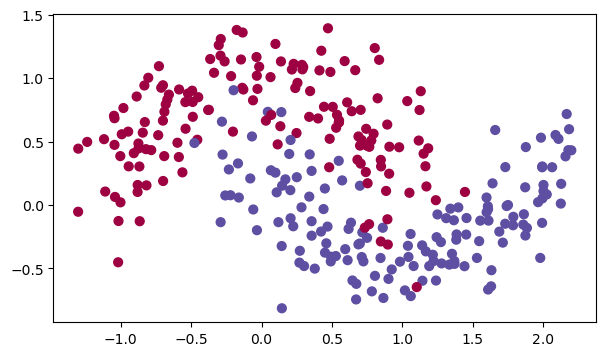

In [21]:
# Load dataset
train_X, train_Y = load_dataset()

# Confirm dataset loaded correctly (optional, if needed for debugging)
# print(f"Training features shape: {train_X.shape}")
# print(f"Training labels shape: {train_Y.shape}")

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def model(X, Y, layers_dims, optimizer, learning_rate=0.0007, mini_batch_size=64, beta=0.9,
          beta1=0.9, beta2=0.999, epsilon=1e-8, num_epochs=10000, print_cost=True):
    """
    Implements a 3-layer neural network model that can run in different optimization modes.

    Args:
    X -- input data, shape: (input size, number of examples)
    Y -- true "label" vector, shape: (1, number of examples)
    layers_dims -- list containing the size of each layer in the network
    optimizer -- choice of optimization method ("gd", "momentum", "adam")
    learning_rate -- learning rate for parameter updates
    mini_batch_size -- size of mini-batches for training
    beta -- momentum hyperparameter (used if 'momentum' optimizer)
    beta1 -- exponential decay hyperparameter for first moment estimate (Adam)
    beta2 -- exponential decay hyperparameter for second moment estimate (Adam)
    epsilon -- small constant to prevent division by zero (Adam)
    num_epochs -- number of epochs for training
    print_cost -- boolean, if True prints the cost every 1000 epochs

    Returns:
    parameters -- dictionary containing updated parameters for the model
    """

    # Initialize important variables
    L = len(layers_dims)                 # number of layers in the neural network
    costs = []                           # store cost per epoch for plotting
    t = 0                                # counter for Adam optimization
    seed = 10                            # set seed for mini-batch shuffling
    m = X.shape[1]                       # number of training examples
    print(f"\nThe number of training examples is: {m}")
    print(f"The mini-batch size is: {mini_batch_size}\n")

    # Initialize parameters based on layer dimensions
    parameters = initialize_parameters(layers_dims)

    # Initialize optimizer-specific variables
    if optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)

    # Main optimization loop
    for epoch in range(num_epochs):
        seed += 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0

        # Iterate over each mini-batch
        for minibatch_X, minibatch_Y in minibatches:
            
            # Forward propagation: calculate activations
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and accumulate total cost
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation: compute gradients
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters based on the chosen optimizer
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t += 1
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t,
                                                               learning_rate, beta1, beta2, epsilon)

        # Compute average cost over all mini-batches
        cost_avg = cost_total / m

        # Print and store cost every 1000 epochs
        if print_cost and epoch % 1000 == 0:
            print(f"Cost after epoch {epoch}: {cost_avg}")
        if print_cost and epoch % 100 == 0:
            costs.append(cost_avg)

    # Plot the cost over epochs
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Epochs (per 100)')
    plt.title(f"Learning rate = {learning_rate}")
    plt.show()

    return parameters


## 5.1 - Mini-batch Gradient descent


The number of training examples is: 300
The mini-batch size is: 64

Cost after epoch 0: 0.7024046849828726
Cost after epoch 1000: 0.66810064295887
Cost after epoch 2000: 0.6352875703390978
Cost after epoch 3000: 0.600491198436302
Cost after epoch 4000: 0.5733672256957693
Cost after epoch 5000: 0.5519772083453836
Cost after epoch 6000: 0.5323695140170054
Cost after epoch 7000: 0.5140067717007158
Cost after epoch 8000: 0.4964720510901484
Cost after epoch 9000: 0.4680136839007519


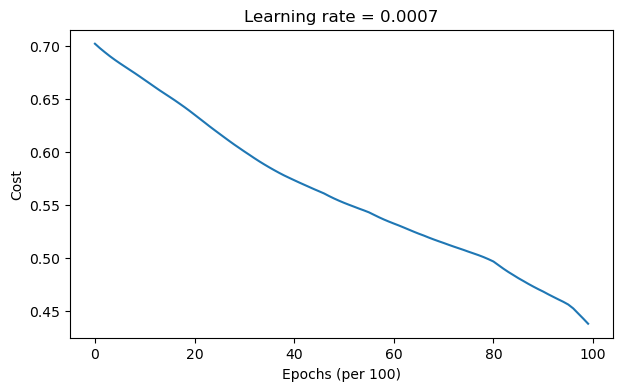

Accuracy: 0.7966666666666666


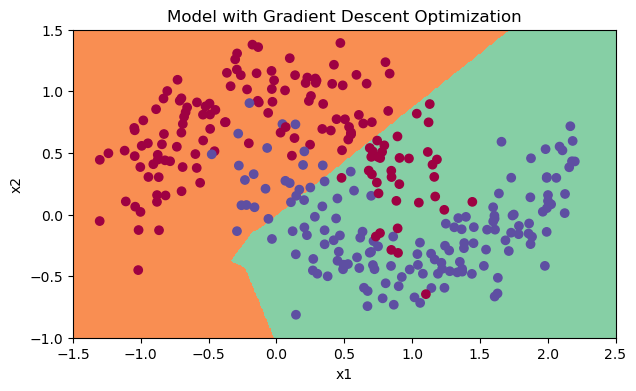

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define the dimensions of the layers for a 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]  # Input layer size, 2 hidden layers, output layer

# Train the model using Gradient Descent optimizer
parameters = model(train_X, train_Y, layers_dims, optimizer="gd")

# Make predictions using the trained model
predictions = predict(train_X, train_Y, parameters)

# Plot the decision boundary to visualize model performance
plt.title("Model with Gradient Descent Optimization")

# Set axis limits for better visualization
plt.xlim([-1.5, 2.5])
plt.ylim([-1, 1.5])

# Plot decision boundary based on the trained parameters
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)



## 5.2 - Mini-batch Gradient descent with momentum


The number of training examples is: 300
The mini-batch size is: 64

Cost after epoch 0: 0.7024127305373173
Cost after epoch 1000: 0.6681667772046955
Cost after epoch 2000: 0.6353882166761965
Cost after epoch 3000: 0.6005907762003798
Cost after epoch 4000: 0.5734441760375261
Cost after epoch 5000: 0.5520579978012191
Cost after epoch 6000: 0.532458404673331
Cost after epoch 7000: 0.5141006579460334
Cost after epoch 8000: 0.49665208993936555
Cost after epoch 9000: 0.46815966712698187


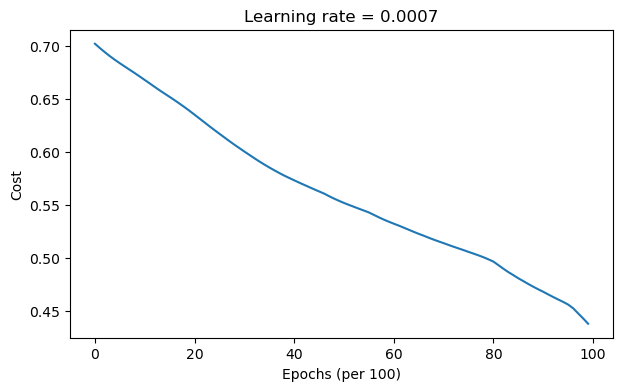

Accuracy: 0.7966666666666666


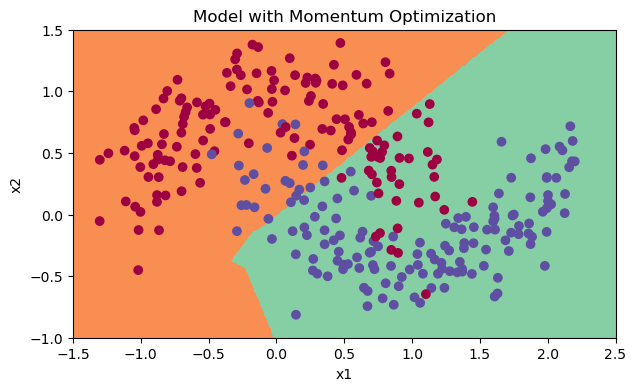

In [26]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define the dimensions of the layers for a 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]  # Input layer, 2 hidden layers, output layer

# Train the model using Momentum optimization
parameters = model(train_X, train_Y, layers_dims, beta1=0.9, optimizer="momentum")

# Make predictions using the trained model
predictions = predict(train_X, train_Y, parameters)

# Plot the decision boundary to visualize model performance
plt.title("Model with Momentum Optimization")

# Set axis limits for a clearer decision boundary plot
plt.xlim([-1.5, 2.5])
plt.ylim([-1, 1.5])

# Plot decision boundary based on the trained parameters
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


## 5.2 - Mini-batch with Adam mode


The number of training examples is: 300
The mini-batch size is: 64

Cost after epoch 0: 0.7021655222604548
Cost after epoch 1000: 0.16784505282581155
Cost after epoch 2000: 0.14131619792956462
Cost after epoch 3000: 0.13878783500985875
Cost after epoch 4000: 0.13606616153974382
Cost after epoch 5000: 0.134240111214826
Cost after epoch 6000: 0.13112698193050087
Cost after epoch 7000: 0.13021564068726493
Cost after epoch 8000: 0.1296233798647996
Cost after epoch 9000: 0.1291183749863679


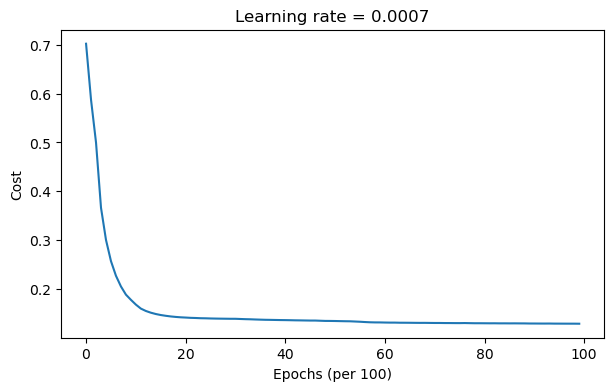

Accuracy: 0.94


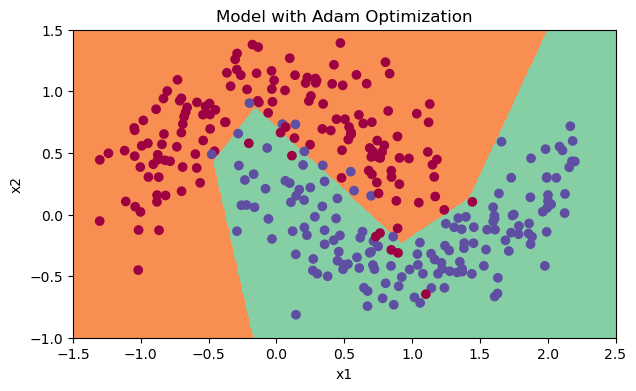

In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define the layer dimensions for the 3-layer neural network
# layers_dims: [input features, neurons in layer 1, neurons in layer 2, output layer]
layers_dims = [train_X.shape[0], 5, 2, 1]  # Example: [features, layer1, layer2, output]

# Train the model using the Adam optimizer
parameters = model(train_X, train_Y, layers_dims, optimizer="adam")

# Make predictions on the training set using the trained model parameters
predictions = predict(train_X, train_Y, parameters)

# Plot the decision boundary to visualize how well the model separates the classes
plt.title("Model with Adam Optimization")

# Set limits for x and y axes for better visualization of the decision boundary
plt.xlim([-1.5, 2.5])  # x-axis range
plt.ylim([-1, 1.5])    # y-axis range

# Plot the decision boundary using the trained parameters
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


## 5.4 - Summary

<table> 
    <tr>
        <th>Optimization Method</th>
        <th>Accuracy</th>
        <th>Cost Shape</th>
    </tr>
    <tr>
        <td>Gradient Descent</td>
        <td>79.7%</td>
        <td>Oscillations</td>
    </tr>
    <tr>
        <td>Momentum</td>
        <td>79.7%</td>
        <td>Oscillations</td>
    </tr>
    <tr>
        <td>Adam</td>
        <td>94%</td>
        <td>Smoother</td>
    </tr>
</table>